In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import MaxAbsScaler

Carregando Arquivo de teste
Treinando RNA - Iteração 1
0.00043726156935692867


c:\Users\felip\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (15000) reached and the optimization hasn't converged yet.
  warnings.warn(


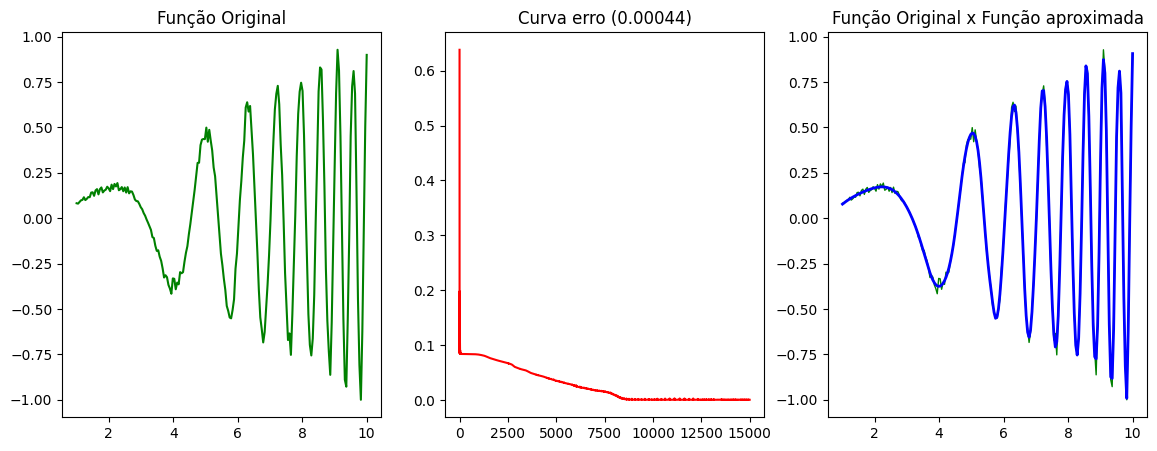

Treinando RNA - Iteração 2
0.00047095775799648896


c:\Users\felip\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (15000) reached and the optimization hasn't converged yet.
  warnings.warn(


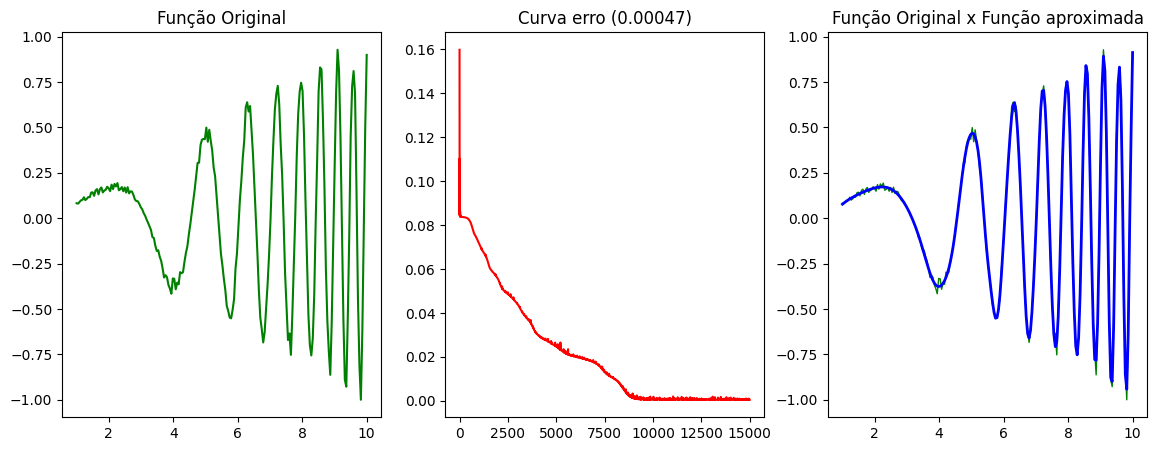

Treinando RNA - Iteração 3
0.00041501964401645776


c:\Users\felip\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (15000) reached and the optimization hasn't converged yet.
  warnings.warn(


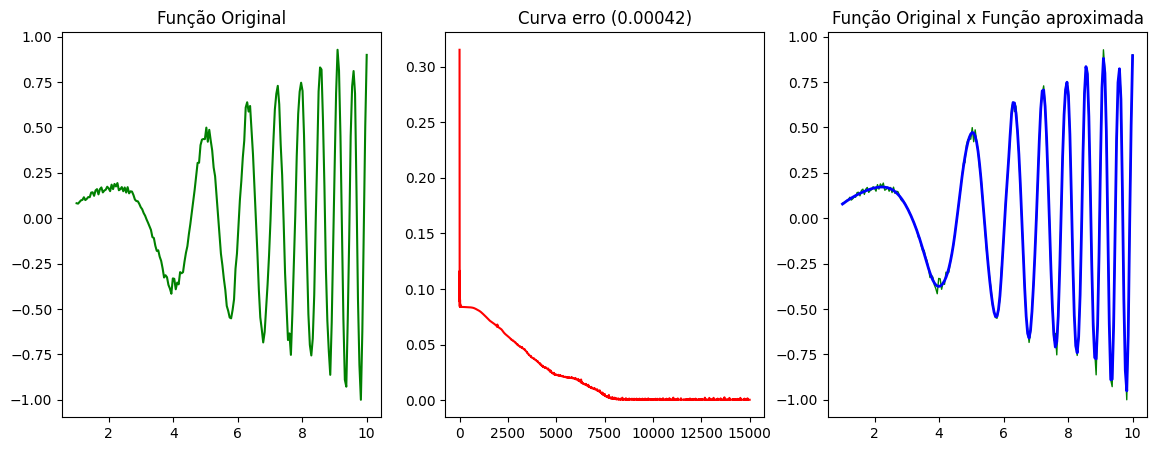

Treinando RNA - Iteração 4
0.0004181021129142273


c:\Users\felip\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (15000) reached and the optimization hasn't converged yet.
  warnings.warn(


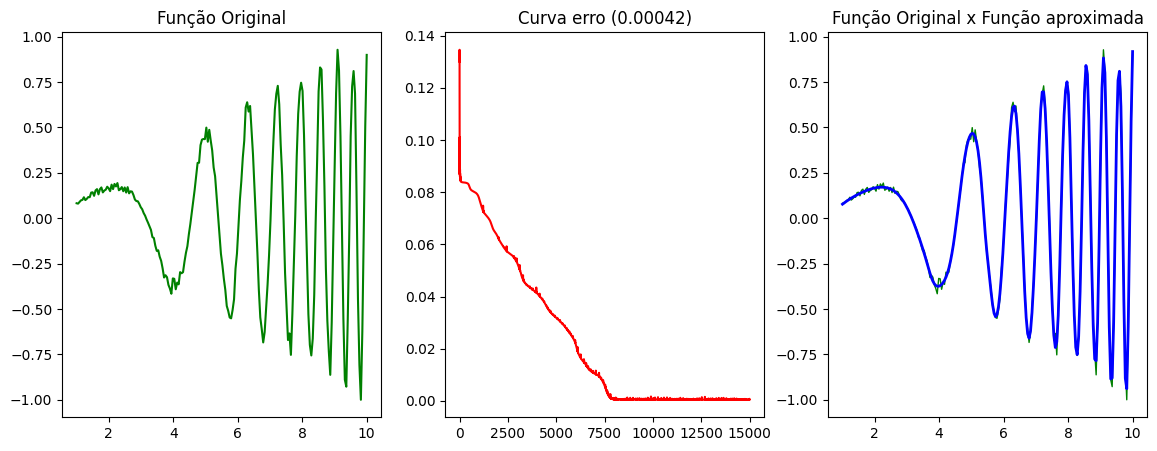

Treinando RNA - Iteração 5
0.0005129208913294484


c:\Users\felip\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (15000) reached and the optimization hasn't converged yet.
  warnings.warn(


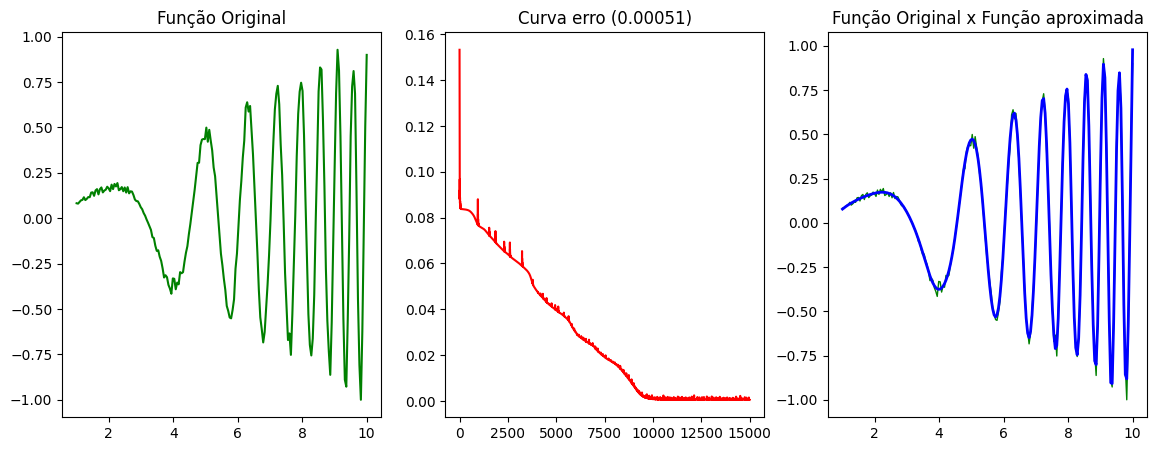

Treinando RNA - Iteração 6
0.00044667097003540083


c:\Users\felip\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (15000) reached and the optimization hasn't converged yet.
  warnings.warn(


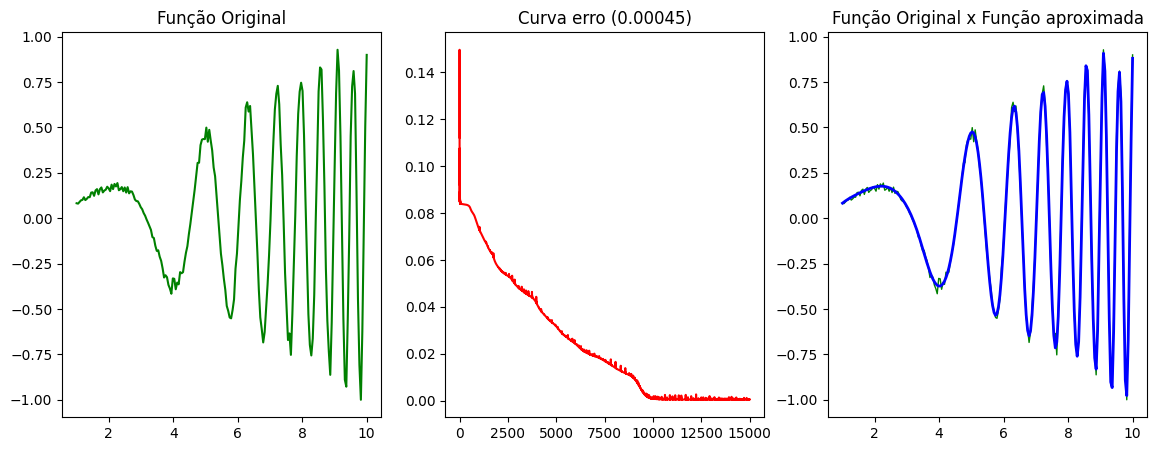

Treinando RNA - Iteração 7
0.0003885823878116999


c:\Users\felip\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (15000) reached and the optimization hasn't converged yet.
  warnings.warn(


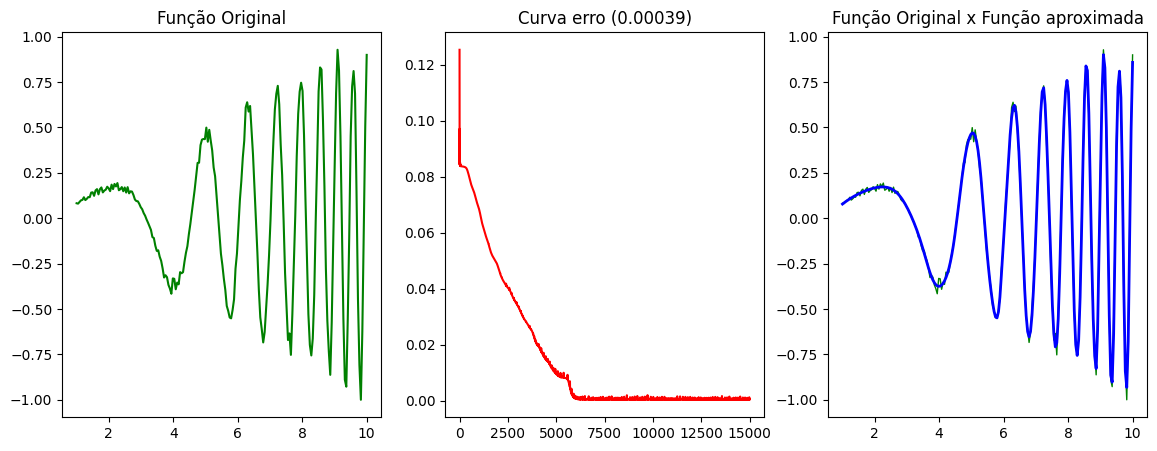

Treinando RNA - Iteração 8
0.00044813682271077794


c:\Users\felip\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (15000) reached and the optimization hasn't converged yet.
  warnings.warn(


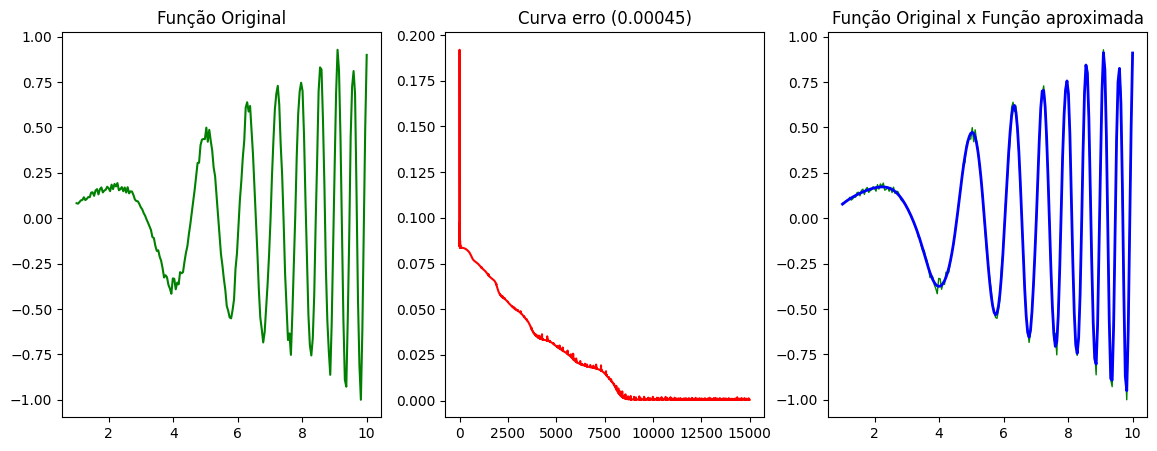

Treinando RNA - Iteração 9
0.00043075044264382603


c:\Users\felip\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (15000) reached and the optimization hasn't converged yet.
  warnings.warn(


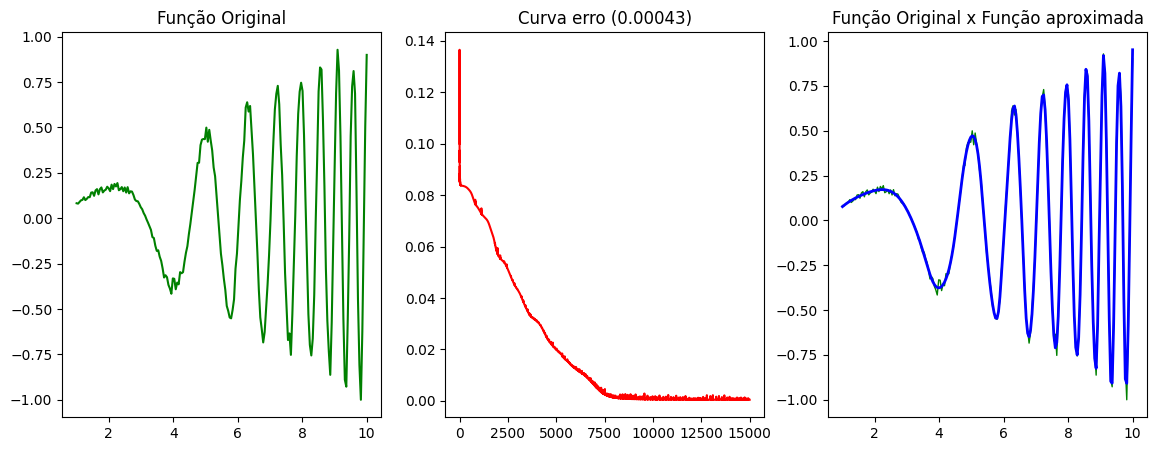

Treinando RNA - Iteração 10
0.000512945638714445


c:\Users\felip\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (15000) reached and the optimization hasn't converged yet.
  warnings.warn(


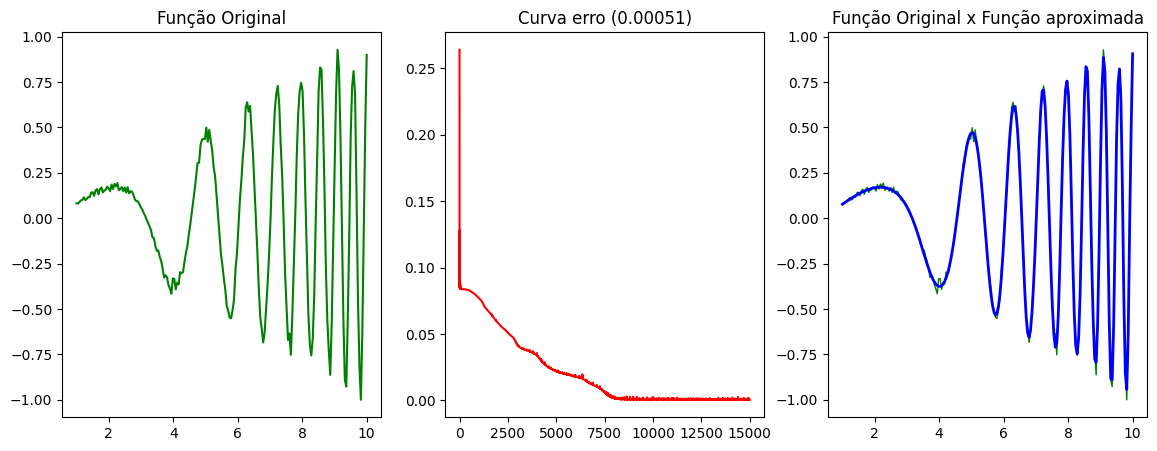

Média de erros: 0.00044813482375297
Desvio padrão erros: 0.0000385827
Menor valor de erro: 0.0003885823878116999


In [5]:
# ----- TESTE 5 ----- #

# Carregando Arquivo de teste
print('Carregando Arquivo de teste')
arquivo = np.load('teste5.npy')
x = arquivo[0]

scale = MaxAbsScaler().fit(arquivo[1])
y = np.ravel(scale.transform(arquivo[1]))

# Definindo o número de iterações
iteracoes = 15000

erros = []
# Repetir o processo 10 vezes
for i in range(10):
  print(f'Treinando RNA - Iteração {i+1}')

  # Criando e treinando o modelo
  regr = MLPRegressor(hidden_layer_sizes=(120, 60, 40),
                      max_iter=iteracoes,
                      activation='tanh',  # {'identity', 'logistic', 'tanh', 'relu'}
                      solver='adam',  # {'lbfgs', 'sgd', 'adam'}
                      learning_rate='adaptive',
                      n_iter_no_change=iteracoes,
                      verbose=False)

  regr.fit(x, y)

  # Predição
  y_est = regr.predict(x)

  plt.figure(figsize=[14, 5])

  # Plot da função original
  plt.subplot(1, 3, 1)
  plt.title('Função Original')
  plt.plot(x, y, color='green')

  # Plot do erro
  plt.subplot(1,3,2)
  plt.title('Curva erro (%s)' % str(round(regr.best_loss_,5)))
  erros.append(regr.best_loss_)
  plt.plot(regr.loss_curve_,color='red')
  print(regr.best_loss_)

  # Plot da função original e aproximada
  plt.subplot(1, 3, 3)
  plt.title('Função Original x Função aproximada')
  plt.plot(x, y, linewidth=1, color='green')
  plt.plot(x, y_est, linewidth=2, color='blue')

  # Mostrar o gráfico
  plt.show()

array_erros = np.array(erros)
media_erros = np.mean(array_erros)
desvio_erros = np.std(array_erros)
menor_erro = np.min(array_erros)

print(f"Média de erros: {media_erros}")
print(f'Desvio padrão erros: {desvio_erros:.10f}')
print(f'Menor valor de erro: {menor_erro}')